<a href="https://colab.research.google.com/github/Crispis723/challenge-Telecom-X/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Llamamos las librerias que vamos a utilizar

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json



Le asignamos una variable a la URL

In [253]:
url =" https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df=pd.read_json(url)

 # 📘 Diccionario de datos

*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

#🔧 Transformación

Miramos la informacion del dataframe

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Miramos las  10  primeras

In [255]:
df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Extraemos los datos y unificamso

In [256]:
# Separar las columnas base
df_base = df[['customerID', 'Churn']].copy()

# Expandir los diccionarios
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Combinar todo en un solo DataFrame
df_final = pd.concat([df_base, df_customer, df_phone, df_internet, df_account], axis=1)


df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Renombramos las listas

In [257]:
df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelacion',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_Senior',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Lineas_Multiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Factura_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}, inplace=True)


Revisamos  el tipo de los datos

In [258]:
df_final.isnull().sum()

df_final.dtypes


,0
ID_Cliente,object
Cancelacion,object
Genero,object
Ciudadano_Senior,int64
Pareja,object
Dependientes,object
Antiguedad,int64
Servicio_Telefono,object
Lineas_Multiples,object
Servicio_Internet,object


In [259]:
# Verificando si hay duplicados
duplicados = df_final.duplicated().sum()
print(f"Número de líneas duplicadas: {duplicados}")

# Verificando si hay valores nulos
print("\nValores nulos por columna:")
valores_nulos_por_columna = df_final.isnull().sum()
print(valores_nulos_por_columna[valores_nulos_por_columna > 0])


Número de líneas duplicadas: 0

Valores nulos por columna:
Series([], dtype: int64)


buscamos espacicios vacios

In [260]:
valores_en_blanco_o_vacio = df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
Cancelacion       224
Cargos_Totales     11
dtype: int64


Convertimos los datos vacios en NAN

In [261]:
df_final['Cargos_Mensuales'] = pd.to_numeric(df_final['Cargos_Mensuales'], errors='coerce')
df_final['Cargos_Totales'] = pd.to_numeric(df_final['Cargos_Totales'], errors='coerce')


Eliminamos los espacios con Naan

In [262]:
df_final.dropna(inplace=True)

##Analisis exploratorio

miramos el porcentaje de valores

In [263]:
df_final['Cancelacion'].value_counts(normalize=True)


,proportion
Cancelacion,
No,0.711549
Yes,0.257580
,0.030871


Desccribimos la informacion de  los datos con valor numerico

In [264]:
df_final.describe()


,Ciudadano_Senior,Antiguedad,Cargos_Mensuales,Cargos_Totales
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


verificamos valores dublicados

In [265]:
# Verificar si hay duplicados en filas completas
duplicados = df_final.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")
 #si se necesitara eliminar df_final = df.drop_duplicates()

Filas duplicadas: 0


imprimimos las filas con dato objectp para ver sus valores

In [266]:
for col in df_final.columns:
    if df_final[col].dtype == 'object':
        print(f"{col}: {df_final[col].unique()}")
        print("-" * 40)


ID_Cliente: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Cancelacion: ['No' 'Yes' '']
----------------------------------------
Genero: ['Female' 'Male']
----------------------------------------
Pareja: ['Yes' 'No']
----------------------------------------
Dependientes: ['Yes' 'No']
----------------------------------------
Servicio_Telefono: ['Yes' 'No']
----------------------------------------
Lineas_Multiples: ['No' 'Yes' 'No phone service']
----------------------------------------
Servicio_Internet: ['DSL' 'Fiber optic' 'No']
----------------------------------------
Seguridad_Online: ['No' 'Yes' 'No internet service']
----------------------------------------
Respaldo_Online: ['Yes' 'No' 'No internet service']
----------------------------------------
Proteccion_Dispositivo: ['No' 'Yes' 'No internet service']
----------------------------------------
Soporte_Tecnico: ['Yes' 'No' 'No internet service']
-----

convertimos cargos totales a numero y eliminamos los espacios diferente a si o no en  cancelacion   y convertimos los vacios en cagos totales en la media

In [267]:
# Aseguramos que 'Cargos_Totales' esté en formato numérico
df_final['Cargos_Totales'] = pd.to_numeric(df_final['Cargos_Totales'], errors='coerce')


# Filtramos valores válidos en 'Cancelacion'
df_final = df_final[df_final['Cancelacion'].isin(['Yes', 'No'])].copy()

# Imputamos la mediana en 'Cargos_Totales'
df_final['Cargos_Totales'] = df_final['Cargos_Totales'].fillna(df_final['Cargos_Totales'].median())


convertimos los no servicios en no

In [268]:
# Homogeneizamos valores que indican ausencia de servicio
cols_no_internet = ['Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
                    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']

for col in cols_no_internet:
    df_final.loc[:, col] = df_final[col].replace('No internet service', 'No')

df_final.loc[:, 'Lineas_Multiples'] = df_final['Lineas_Multiples'].replace('No phone service', 'No')



Creamos la columna valor diario

In [269]:
df_final['Cargo_Diario'] = df_final['Cargos_Mensuales'] / 30


convertimos los datos a numeros

In [270]:
yes_no_cols = ['Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples',
                  'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
                  'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cancelacion']

# Convertimos columnas binarias
for col in yes_no_cols:
    df_final.loc[:, col] = df_final[col].map({'Yes': 1, 'No': 0})



#📊 Carga y análisis

df_final.

In [271]:
df_final.head()


,ID_Cliente,Cancelacion,Genero,Ciudadano_Senior,Pareja,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [273]:
df_final.describe()


,Ciudadano_Senior,Antiguedad,Cargos_Mensuales,Cargos_Totales,Cargo_Diario
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


miramos la mediana y desviacion estandar

In [276]:
print("Mediana de Cargos_Mensuales:", df_final['Cargos_Mensuales'].median())
print("Desviación estándar de Antiguedad:", df_final['Antiguedad'].std())


Mediana de Cargos_Mensuales: 70.35
Desviación estándar de Antiguedad: 24.54525970926324


## Graficas

Creamos un formato para las graficas

In [280]:
def preparar_df_binario(df_original):
    """Convierte columnas binarias 1/0 en Sí/No para visualización"""
    df_viz = df_original.copy()
    convertir = {1: 'Sí', 0: 'No'}

    columnas_binarias = [
        'Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples',
        'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
        'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
        'Factura_Electronica', 'Cancelacion'
    ]

    for col in columnas_binarias:
        if col in df_viz.columns:
            df_viz[col] = df_viz[col].map(convertir)

    return df_viz


generamos la grafica de cancelacion

/tmp/ipython-input-282-2758257654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancelacion', data=df_vis, palette='Set2', ax=axs[0])


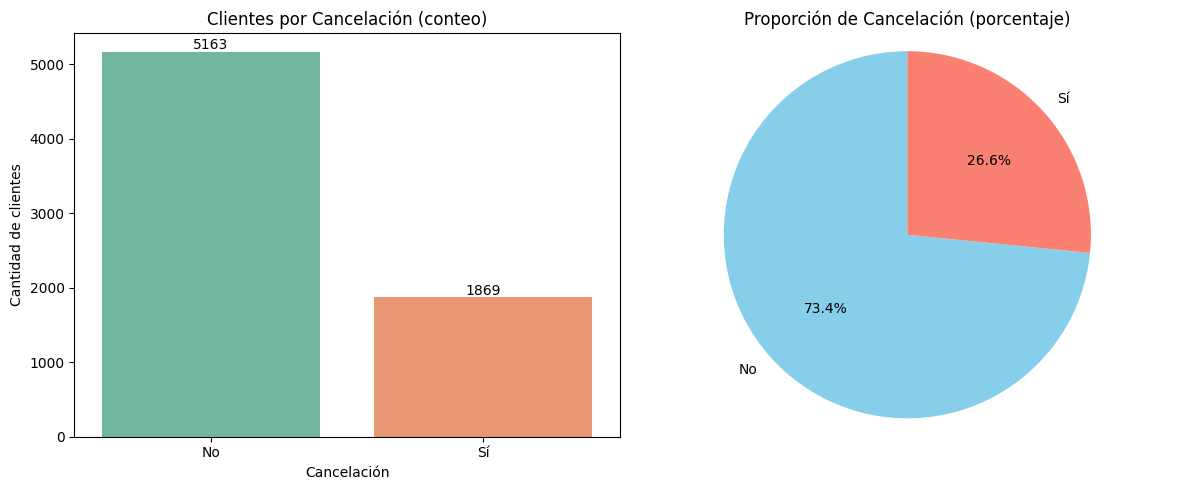

In [282]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras con valores exactos
sns.countplot(x='Cancelacion', data=df_vis, palette='Set2', ax=axs[0])
axs[0].set_title('Clientes por Cancelación (conteo)')
axs[0].set_xlabel('Cancelación')
axs[0].set_ylabel('Cantidad de clientes')

# Añadir etiquetas encima de las barras
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Gráfico de pastel con porcentajes
churn_counts = df_vis['Cancelacion'].value_counts(normalize=True)
axs[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
           startangle=90, colors=['skyblue', 'salmon'])
axs[1].set_title('Proporción de Cancelación (porcentaje)')
axs[1].axis('equal')  # Mantiene la forma circular

plt.tight_layout()
plt.show()



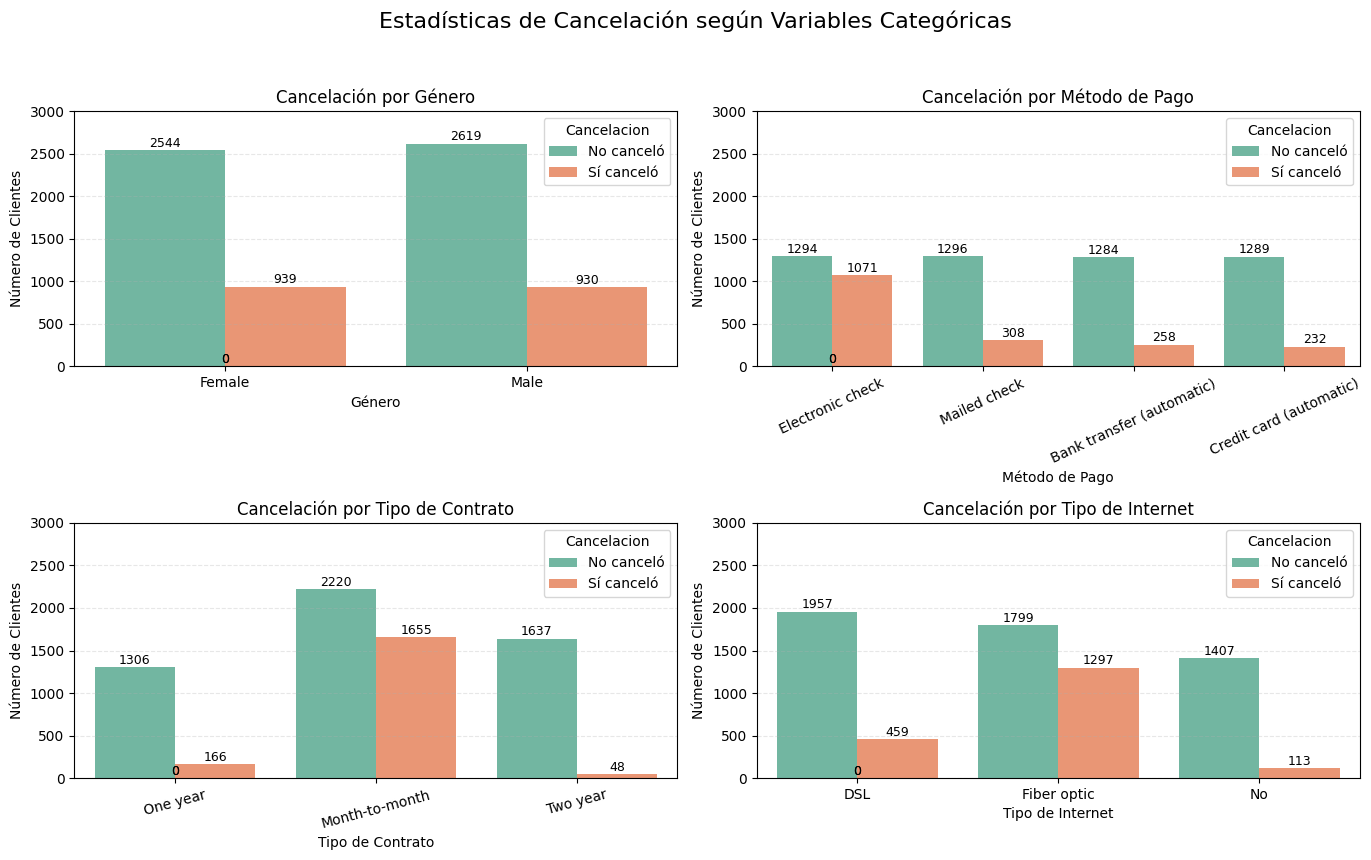

In [285]:
# Mapeo más explicativo para cancelación
df_vis = preparar_df_binario(df_final)
df_vis['Cancelacion'] = df_vis['Cancelacion'].map({'Sí': 'Sí canceló', 'No': 'No canceló'})

fig, axs = plt.subplots(2, 2, figsize=(14, 9))
fig.subplots_adjust(wspace=0.4, hspace=0.5)
fig.suptitle("Estadísticas de Cancelación según Variables Categóricas", fontsize=16)

# --- Función para colocar etiquetas en cada barra ---
def etiquetar_barras(ax, formato='%d'):
    for p in ax.patches:
        valor = formato % p.get_height()
        ax.annotate(valor,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=9, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

# 🟣 Gráfico 1: Género
ax1 = sns.countplot(x='Genero', hue='Cancelacion', data=df_vis, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title("Cancelación por Género")
axs[0, 0].set_xlabel("Género")
axs[0, 0].set_ylabel("Número de Clientes")
etiquetar_barras(ax1)

# 🟣 Gráfico 2: Método de Pago (ordenado por tasa de cancelación)
orden_pago = df_vis.groupby('Metodo_Pago')['Cancelacion'].apply(lambda x: (x == 'Sí canceló').mean())
orden_pago = orden_pago.sort_values(ascending=False).index
ax2 = sns.countplot(x='Metodo_Pago', hue='Cancelacion', data=df_vis, palette='Set2',
                    ax=axs[0, 1], order=orden_pago)
axs[0, 1].set_title("Cancelación por Método de Pago")
axs[0, 1].set_xlabel("Método de Pago")
axs[0, 1].set_ylabel("Número de Clientes")
axs[0, 1].tick_params(axis='x', rotation=25)
etiquetar_barras(ax2)

# 🟣 Gráfico 3: Contrato
ax3 = sns.countplot(x='Contrato', hue='Cancelacion', data=df_vis, palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title("Cancelación por Tipo de Contrato")
axs[1, 0].set_xlabel("Tipo de Contrato")
axs[1, 0].set_ylabel("Número de Clientes")
axs[1, 0].tick_params(axis='x', rotation=15)
etiquetar_barras(ax3)

# 🟣 Gráfico 4: Tipo de Internet
ax4 = sns.countplot(x='Servicio_Internet', hue='Cancelacion', data=df_vis, palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title("Cancelación por Tipo de Internet")
axs[1, 1].set_xlabel("Tipo de Internet")
axs[1, 1].set_ylabel("Número de Clientes")
etiquetar_barras(ax4)

# ✨ Estilo uniforme
for ax in axs.ravel():
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_ylim(0, 3000)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



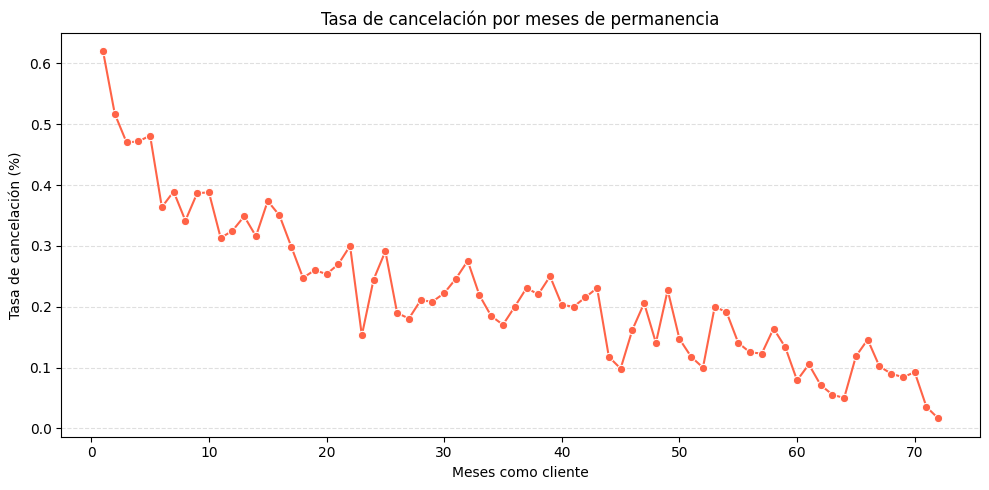

In [287]:
# Crear copia del DataFrame
df_churn = df_final.copy()

# Agrupar por Antiguedad y calcular tasa de cancelación (ya está en 0/1)
churn_por_tenure = df_churn.groupby('Antiguedad')['Cancelacion'].mean()

# Visualización
plt.figure(figsize=(10, 5))
sns.lineplot(x=churn_por_tenure.index, y=churn_por_tenure.values, marker='o', color='tomato')
plt.title('Tasa de cancelación por meses de permanencia')
plt.xlabel('Meses como cliente')
plt.ylabel('Tasa de cancelación (%)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



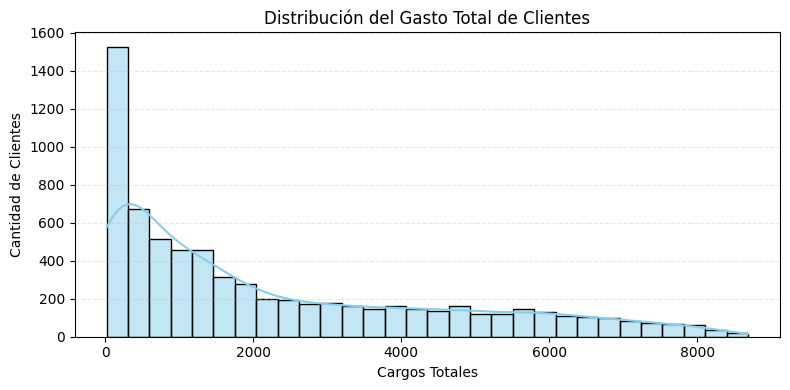

In [288]:
plt.figure(figsize=(8, 4))
sns.histplot(df_final['Cargos_Totales'], kde=True, bins=30, color='skyblue')
plt.title("Distribución del Gasto Total de Clientes")
plt.xlabel("Cargos Totales")
plt.ylabel("Cantidad de Clientes")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#📄Informe final

##🔹 1. Introducción
El objetivo principal de este análisis es entender los factores que influyen en la evasión de clientes (churn) en una empresa de telecomunicaciones. La evasión ocurre cuando un cliente cancela su contrato, lo que representa una pérdida directa de ingresos.

Mediante el análisis de los datos disponibles, buscamos responder preguntas como:

* ¿Qué perfiles de clientes son más propensos a cancelar?

* ¿Qué servicios o métodos de pago están asociados a mayor churn?

* ¿Qué patrones podemos encontrar para tomar decisiones estratégicas?

##🔹 2. Limpieza y Tratamiento de Datos
A partir del archivo JSON original, se aplicaron los siguientes pasos:

* Importación y normalización del archivo JSON.

* Conversión de columnas numéricas (como TotalCharges) a formato numérico con manejo de errores.

* Eliminación de registros nulos o inválidos (como churn vacío o errores de facturación).

* Corrección de inconsistencias en columnas como 'No internet service' → 'No'.

* Creación de nuevas columnas como:

  *  Cuentas_Diarias: estimación del costo diario por cliente.

* Conversión de variables categóricas a binarias (1/0) para facilitar análisis y modelado.

##3. Análisis Exploratorio de Datos (EDA)
####📊 Distribución de Churn
Se encontró un desbalance: la mayoría de los clientes no cancela, pero una fracción significativa sí lo hace.




```
# sns.countplot(x='Churn', data=df_final)
```

####📊 Churn según variables categóricas
Usando una matriz de 4 gráficos analizamos:

* Género: no hay gran diferencia entre hombres y mujeres.

* Tipo de contrato: los clientes con contrato mensual tienen mucho más churn.

* Método de pago: quienes pagan con cheque electrónico tienen mayor evasión.

* Tipo de internet: quienes usan Fiber optic presentan más churn.

####📊 Análisis de tenure y Churn
* Clientes con menos de 10 meses tienen la mayor tasa de evasión.

* Esto indica un problema en la retención temprana.

####📊 Análisis del Gasto Total (TotalCharges)
Matriz de 4 gráficos muestra:

1. Distribución del gasto total (asimétrica, muchos clientes pagan poco).

2. Boxplot de Churn muestra que quienes se van tienden a tener menos gasto.

3. Scatterplot confirma relación lineal entre tenure y TotalCharges.

4. Tasa de churn por rango de gasto revela que los que menos gastan son los más propensos a cancelar

##🔹 4. Conclusiones e Insights
La evasión está concentrada en clientes con contrato mensual.

* Clientes que usan Fiber Optic o pagan con cheque electrónico son más propensos a irse.

* La mayoría del churn ocurre en los primeros meses (menor a 10).

* Los clientes que gastan poco y llevan poco tiempo son los más volátiles.

* Clientes con mayor tenure y gasto tienden a ser más leales.

##🔹 5. Recomendaciones
Con base en los hallazgos, se sugieren las siguientes acciones:

* ✅ Fidelizar al cliente en los primeros meses: implementar programas de bienvenida, beneficios por permanencia o descuentos a los 3-6 meses.

* ✅ Incentivar contratos a largo plazo: campañas que premien pasar de mensual a anual.

* ✅ Revisar experiencia de clientes con Fiber Optic y cheque electrónico: posibles problemas técnicos o de facturación.

* ✅ Segmentar campañas por gasto total y riesgo de churn: usar modelos predictivos para enfocar esfuerzos en los clientes con mayor riesgo.

* ✅ Diseñar alertas para detectar patrones de salida temprana: por ejemplo, inactividad, bajo uso o quejas.